# What Factors Affect Laptop Prices?

Danh sách thành viên nhóm 1 - S2:

| STT | MSSV | Họ và Tên |
| --- | --- | :-- |
| 35 | 20133076 | Văn Mai Thanh Nhật |
| 42 | 20133082 | Huỳnh Minh Phước |
| 3 | 20133029 | Nguyễn Trí Dũng |
| 14 | 20133047 | Lương Gia Huy |


### Phần 1.Nhập dữ liệu

In [120]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.graph_objects as go
import scipy.stats as stats
import missingno as msno
pio.renderers.default = "notebook_connected"
%matplotlib inline
df = pd.read_csv('.\data\Cleaned_Laptop_data.csv')
# những thuộc tính của dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            801 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  657 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     564 non-null    float64
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [121]:
# IN 5 DÒNG ĐẦU DỮ LIỆU
df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,NaN,0,No,No,324.870,426.270,23,3.700,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,NaN,0,No,No,254.670,277.225,8,3.600,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,NaN,0,No,No,259.870,363.870,28,3.700,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,NaN,0,No,No,279.370,363.870,23,3.700,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,NaN,0,No,No,324.870,435.370,25,3.700,1657,234


Trong phần dữ liệu có gồm có tổng cộng 23 biến gồm các loại biến như biến số định danh ( tên hãng, tên phiên bản, vi xử lý, ….) , biến số định lượng (ram, ssd, giá, …), ngoài ra còn sử dụng biến số nhị giá (như là màn hình cảm ứng, msoffice). Tập dữ liệu gồm tất cả 896 bộ dữ liệu. Trong đó có 28,3% laptop đến từ thương hiệu ASUS, 17.2% đến từ DELL, 16,5% đến từ Lenovo, 15,8% đến từ HP, và phần còn lại đến từ những thương hiệu khác.

### Phần 2.Tiền xử lý
#### 2.1. Biễu diễn những thuộc tính bị thiếu

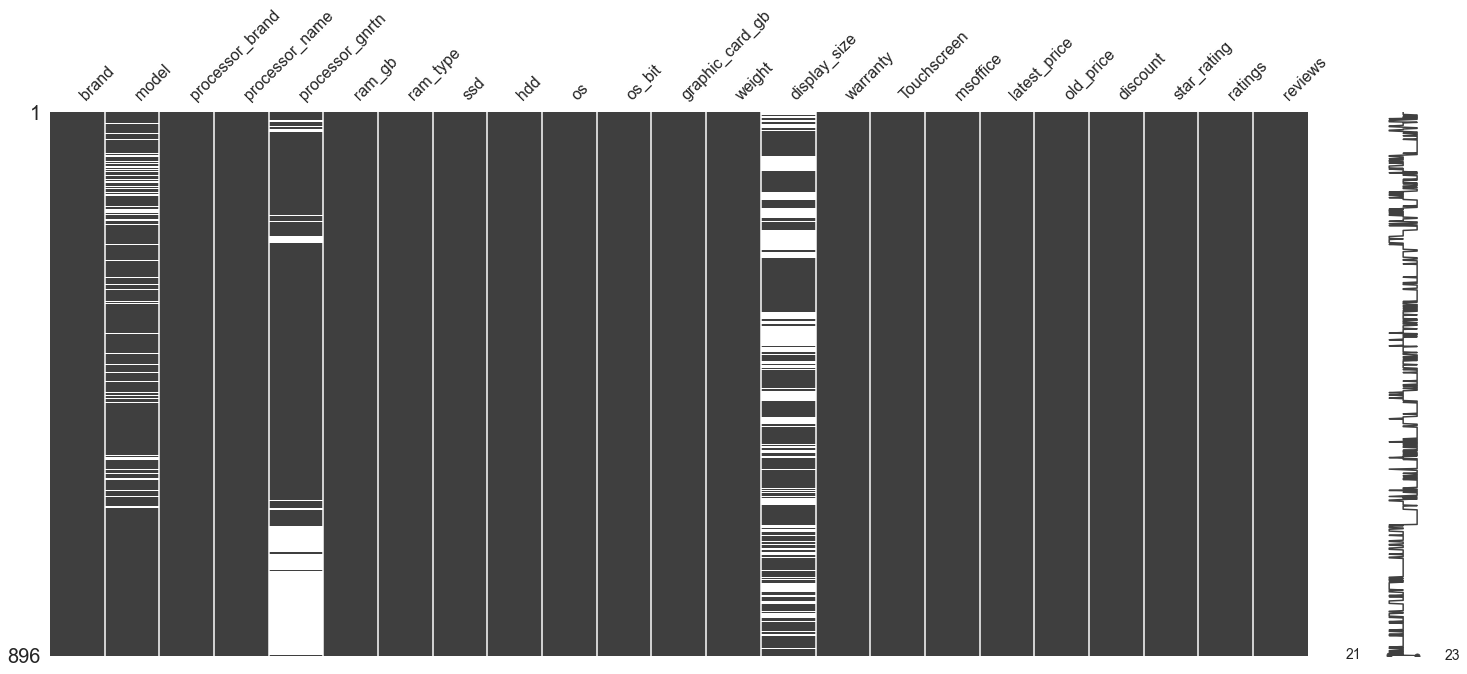

<Figure size 1080x648 with 0 Axes>

In [122]:
# BIỄU DIỄN NHỮNG THUỘC TÍNH BỊ THIẾU
import missingno as msno
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

Các dữ liệu còn thiếu

In [123]:
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
missing_columns

['model', 'processor_gnrtn', 'display_size']

#### 2.2. Xử lí các dữ liệu bị thiếu

In [124]:
# TÌM GIÁ TRỊ PHỔ BIẾN TRONG TỪNG THUỘC TÍNH
import statistics as stat
fill_size=stat.mode(df['display_size'])
fill_p_gen=stat.mode(df['processor_gnrtn'])
fill_model="Unknown"

# ĐIỀN VÀO NHỮNG Ô BỊ THIẾU
df['model'].fillna(fill_model,inplace=True)
df['processor_gnrtn'].fillna(fill_p_gen,inplace=True)
df['display_size'].fillna(fill_size,inplace=True)

#### 2.3. Kiểm tra bộ dữ liệu

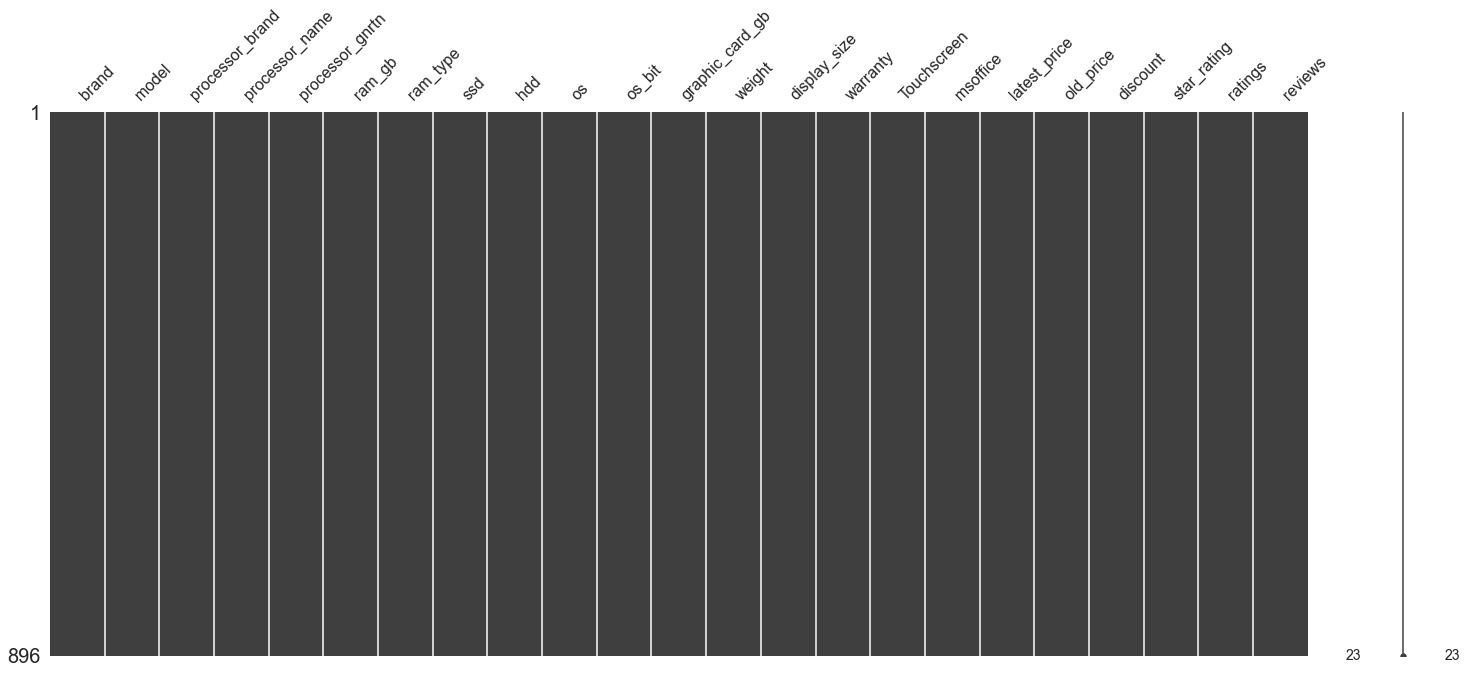

<Figure size 1080x648 with 0 Axes>

In [125]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

Có thể thấy dữ liệu sau khi được xử lí đã không còn dữ liệu trống và trở thành một bộ dữ liệu hoàn chỉnh.

## Phần 3 - Trực quan hóa dữ liệu
### 3.1 Thống kê Thương hiệu:

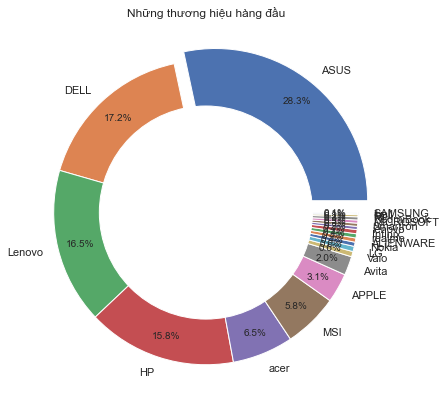

In [126]:
# create data
data = df['brand'].value_counts().values.tolist()
labels = df['brand'].value_counts().index.tolist()
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0)
plt.figure(figsize=(7,7))
# Create a pieplot
plt.pie(data, labels=labels,autopct='%1.1f%%',pctdistance=0.85,explode=explode)
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Những thương hiệu hàng đầu')
plt.show()

### 3.2 Thống kê dòng máy:

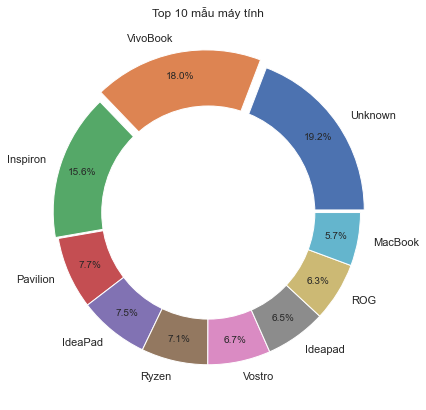

In [127]:
# create data
data = (df['model'].value_counts()/df['model'].value_counts().sum()*100).head(10).values.tolist()
labels = (df['model'].value_counts()/df['model'].value_counts().sum()*100).head(10).index.tolist()
total = (df['model'].value_counts()/df['model'].value_counts().sum()*100).sum()
explode = (0.03,0.07 , 0.02, 0, 0, 0, 0, 0, 0, 0)
plt.figure(figsize=(7,7))
# Create a pieplot
plt.pie(data, labels=labels,autopct=lambda x: '{:.1f}%'.format((x*total)/100),pctdistance=0.85,explode=explode)
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Top 10 mẫu máy tính')
plt.show()

### 3.3 Thống kê vi xử lý:

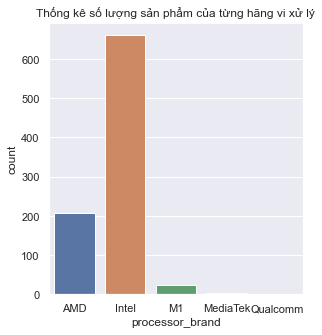

In [128]:
plt.figure(figsize=(10,5))
plt.subplot(122)
# train = df.
ax = sns.countplot(x = "processor_brand", data = df).set(title='Thống kê số lượng sản phẩm của từng hãng vi xử lý')
plt.subplot(122)
# create data
data = (df['processor_name'].value_counts()/df['processor_name'].value_counts().sum()*100).head(10).values.tolist()
labels = (df['processor_name'].value_counts()/df['processor_name'].value_counts().sum()*100).head(10).index.tolist()
total = (df['processor_name'].value_counts()/df['processor_name'].value_counts().sum()*100).sum()
explode = (0.07,0.03 , 0.02, 0, 0, 0, 0, 0, 0, 0)

### 4.2 Thống kê dòng máy:
fig = px.pie(values=data, names=labels, title='Thống kê phần trăm của từng loại vi xử lý',hole=0.5,height=500,width=500)
fig.show()
fig1 = px.sunburst(df, path=['processor_brand', 'processor_name'], color='ram_gb',title='Hãng vi xử lí và loại vi xử lí')
fig1.show()

### 3.4 Thống kê về RAM:

In [129]:
fig = px.sunburst(df, path=['ram_gb', 'ram_type'], color='ram_gb',title='Lượng RAM và kiểu RAM')
fig.show()

### 3.5 Thống kê về ổ đĩa:

In [130]:
fig = px.sunburst(df, path=['ssd', 'hdd'], color='os',title='SSD vs HDD: Inside SSD, Outside HDD ',width=500)
fig.show()

### 3.6. Tương quan giữa Card đồ họa, thương hiệu và giá tiền

In [131]:
# SỰ TƯƠNG QUAN GIỮA DUNG LƯỢNG CẠC ĐỒ HOẠ, THƯƠNG HIỆU, VÀ GIÁ TIỀN
fig = px.scatter_3d(df, x='graphic_card_gb', y='brand', z='latest_price',
              color='brand')

fig.show()

### 4. Kiểm định giả thuyết
Kiểm định chứng minh các yếu tố phần cứng có ảnh hưởng tới giá thành laptop.

Đặt các giả thuyết:
- H0: Mức giá các nhóm độc lập bằng nhau
- H1: Mức giá các nhóm độc lập không bằng nhau


Với mức p-value thấp hơn 0.05, phủ định giả thuyết H0.
Ngược lại, bác bỏ giả thuyết H0, chấp nhận giả thuyết H1.

In [132]:
column_hardware = []
for column_name in df.columns:
    if df[column_name].dtypes == 'object':
        column_hardware.append(column_name)
        
column_hardware = column_hardware + ['graphic_card_gb', 'display_size', 'warranty']     

for column in column_hardware:
    unique_category = len(df[column].unique())
    print("{} có {} loại:{}\n".format(column.upper(),unique_category,df[column].unique()))

BRAND có 21 loại:['Lenovo' 'Avita' 'HP' 'acer' 'ASUS' 'DELL' 'RedmiBook' 'realme' 'Infinix'
 'MSI' 'lenovo' 'MICROSOFT' 'Smartron' 'LG' 'Nokia' 'APPLE' 'Vaio' 'Mi'
 'ALIENWARE' 'iball' 'SAMSUNG']

MODEL có 117 loại:['A6-9225' 'Ideapad' 'PURA' 'APU' 'Athlon' 'Aspire' 'ExpertBook' 'Unknown'
 'v15' 'VivoBook' 'EeeBook' 'Nitro' 'Cosmos' 'x360' 'IdeaPad' 'Celeron'
 '15q' '250-G6' 'Vostro' '15' 'Pavilion' 'Book' 'Inspiron' 'INBook'
 'ThinkPad' 'Chromebook' 'Commercial' '14s' 'INSPIRON' 'V15' '15s' '3000'
 'Notebook' 'Vivo' 'DA' 'Insprion' 'Travelmate' '14a' 'Predator' 'Spin'
 'Swift' 'ROG' 'XPS' 'Omen' 'Surface' 't.book' 'Yoga' 'Gram' 'Spectre'
 'VivoBook14' 'TUF' 'Book(Slim)' 'Pro' 'PureBook' 'ASUS' 'Katana' 'GF63'
 'Thinkbook' 'Intel' 'G15' 'ZenBook' 'Legion' 'Modern' 'ThinkBook'
 'Prestige' 'Zenbook' 'MacBook' 'Sword' 'Envy' 'SE' 'ConceptD' 'HP' 'DELL'
 'X390' 'Thinpad' 'Inpiron' 'GAMING' 'GS' '430' 'Liber' 'F17' 'B50-70'
 'GE76' 'GP65' 'GP76' '250' '3511' 'G3' 'GS66' 'X1' 'GF65' 'Stealth

In [133]:
def Do_Thi_Khoang_Tin_Cay_Cua_Gia(Bien_phan_loai):
    data_dict = {}
    temp = []
    temp1 = []
    temp2 = []
    for unique in df[Bien_phan_loai].unique():
        data = df.loc[df[Bien_phan_loai] == unique]["latest_price"]
        x = stats.norm.interval(alpha=0.95,loc = np.mean(data),scale =stats.sem(data))[0]
        temp.append(x)
        y = stats.norm.interval(alpha=0.95,loc = np.mean(data),scale =stats.sem(data))[1]
        temp1.append(y)
        temp2.append(unique)
    data_dict['lower'] = temp
    data_dict['upper'] = temp1
    data_dict['category'] = temp2

    dataset = pd.DataFrame(data_dict).sort_values(by = 'lower')
    dataset = dataset.dropna()
    plt.rcParams["figure.figsize"] = (10,5)

    for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
        plt.plot((lower,upper),(y,y),'ro-',color='blue')
    plt.yticks(range(len(dataset)),list(dataset['category']),)
    plt.title('Khoảng tin cậy cho giá trị trung bình với độ tin cậy 95%')

In [134]:
def Do_Thi_Model_Cho_Tung_Brand(brand):
    data_dict = {}
    temp = []
    temp1 = []
    temp2 = []
    for unique in brand:
        data = df.loc[df.model == unique]["latest_price"]
        x = stats.norm.interval(alpha=0.95,loc = np.mean(data),scale =stats.sem(data))[0]
        temp.append(x)
        y = stats.norm.interval(alpha=0.95,loc = np.mean(data),scale =stats.sem(data))[1]
        temp1.append(y)
        temp2.append(unique)
    data_dict['lower'] = temp
    data_dict['upper'] = temp1
    data_dict['category'] = temp2

    dataset = pd.DataFrame(data_dict).sort_values(by='lower')
    dataset = dataset.dropna()
    # print(dataset['category'])
    plt.rcParams["figure.figsize"] = (10,5)
    for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
        plt.plot((lower,upper),(y,y),'ro-',color='blue')
    plt.yticks(range(len(dataset)),list(dataset['category']),)
    plt.title('Khoảng tin cậy cho giá trị trung bình với độ tin cậy 95%')

In [135]:
def Do_Thi_Cho_Tung_Loai_Processor(brand):
    data_dict = {}
    temp = []
    temp1 = []
    temp2 = []
    for unique in brand:
        data = df.loc[df.processor_name == unique]["latest_price"]
        x = stats.norm.interval(alpha=0.95,loc = np.mean(data),scale =stats.sem(data))[0]
        temp.append(x)
        y = stats.norm.interval(alpha=0.95,loc = np.mean(data),scale =stats.sem(data))[1]
        temp1.append(y)
        temp2.append(unique)
    data_dict['lower'] = temp
    data_dict['upper'] = temp1
    data_dict['category'] = temp2

    dataset = pd.DataFrame(data_dict).sort_values(by='lower')
    dataset = dataset.dropna()
    # print(dataset['category'])
    plt.rcParams["figure.figsize"] = (10,5)
    for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
        plt.plot((lower,upper),(y,y),'ro-',color='blue')
    plt.yticks(range(len(dataset)),list(dataset['category']),)
    plt.title('Khoảng tin cậy cho giá trị trung bình với độ tin cậy 95%')

### 4.1. Hệ điều hành


              df        sum_sq      mean_sq      F  PR(>F)
os         2.000  45040090.731 22520045.365 70.909   0.000
Residual 893.000 283607500.119   317589.586    NaN     NaN 

          count     mean      std
os                               
DOS      36.000 1638.545 1016.539
Mac      28.000 1972.202  713.794
Windows 832.000  931.067  530.290


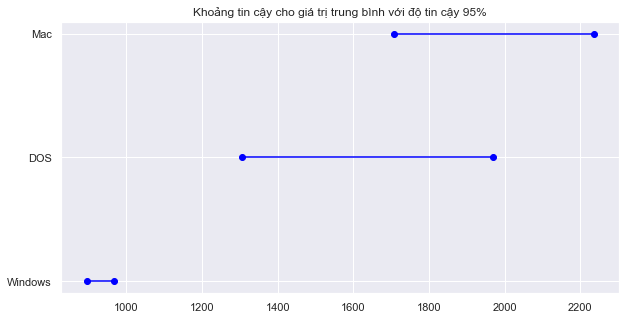

In [136]:
#OS
lm=ols('latest_price ~ os',data=df).fit()
table=sm.stats.anova_lm(lm)
print(table,"\n")
if sm.stats.anova_lm(lm)['PR(>F)'][0] < 0.05:
    x = df.groupby('os')['latest_price'].describe()
    print(x.drop(['min', 'max', '25%', '50%', '75%'], axis = 1))

    Do_Thi_Khoang_Tin_Cay_Cua_Gia('os')

    

### 4.2. Dung lượng card đồ hoạ 


                     df        sum_sq      mean_sq       F  PR(>F)
graphic_card_gb   1.000  78204179.288 78204179.288 279.163   0.000
Residual        894.000 250443411.562   280138.044     NaN     NaN 

                  count     mean     std
graphic_card_gb                         
0               631.000  849.326 487.437
2                69.000 1005.079 366.039
4               138.000 1163.368 436.149
6                40.000 1942.713 943.137
8                18.000 2518.265 910.916


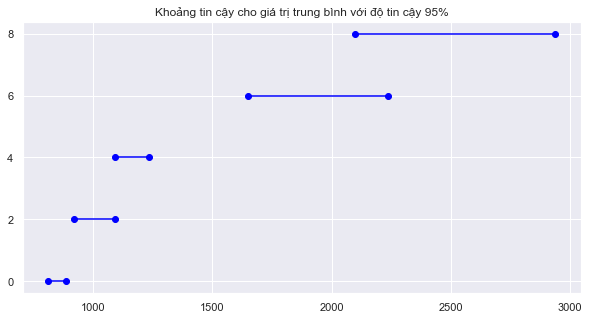

In [137]:
#graphic card
lm=ols('latest_price ~ graphic_card_gb',data=df).fit()
table=sm.stats.anova_lm(lm)
print(table,"\n")

if sm.stats.anova_lm(lm)['PR(>F)'][0] < 0.05:
    x = df.groupby('graphic_card_gb')['latest_price'].describe()
    print(x.drop(['min', 'max', '25%', '50%', '75%'], axis = 1))
    Do_Thi_Khoang_Tin_Cay_Cua_Gia('graphic_card_gb')

    

### 4.3. Cân nặng


              df        sum_sq      mean_sq      F  PR(>F)
weight     2.000  22673034.332 11336517.166 33.086   0.000
Residual 893.000 305974556.518   342636.681    NaN     NaN 

             count     mean     std
weight                             
Casual     566.000 1109.818 682.299
Gaming      39.000  964.783 212.176
ThinNlight 291.000  766.576 377.096


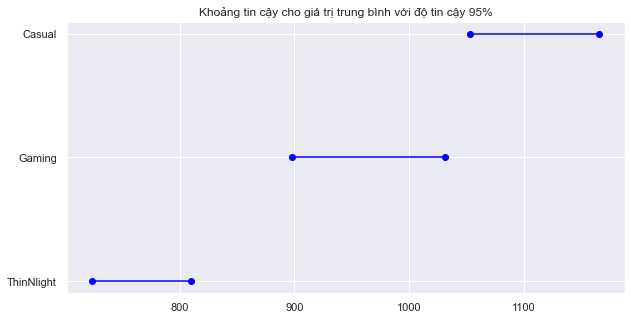

In [138]:
#weight
lm=ols('latest_price ~ weight',data=df).fit()
table=sm.stats.anova_lm(lm)
print(table,'\n')

if sm.stats.anova_lm(lm)['PR(>F)'][0] < 0.05:
    x = df.groupby('weight')['latest_price'].describe()
    print(x.drop(['min', 'max', '25%', '50%', '75%'], axis = 1))

    Do_Thi_Khoang_Tin_Cay_Cua_Gia('weight')

    

### 4.4. OS-bit


In [139]:
#os_bit
lm=ols('latest_price ~ os_bit',data=df).fit()
table=sm.stats.anova_lm(lm)
print(table,'\n')

if sm.stats.anova_lm(lm)['PR(>F)'][0] < 0.05:
    x = df.groupby('os_bit')['latest_price'].describe()
    print(x.drop(['min', 'max', '25%', '50%', '75%'], axis = 1))
    Do_Thi_Khoang_Tin_Cay_Cua_Gia('os_bit')


              df        sum_sq     mean_sq     F  PR(>F)
os_bit     1.000   1120457.871 1120457.871 3.058   0.081
Residual 894.000 327527132.979  366361.446   NaN     NaN 



### 4.5. Kích thước màn hình


                  df        sum_sq     mean_sq      F  PR(>F)
display_size   1.000   4816679.283 4816679.283 13.297   0.000
Residual     894.000 323830911.567  362226.970    NaN     NaN 

               count     mean     std
display_size                         
12.200         2.000  623.870  91.924
13.000         4.000 1660.620 792.209
13.300        40.000 1253.278 342.811
13.400         1.000 1494.870     NaN
14.000       131.000  748.053 239.276
14.100         6.000  532.025  84.252
14.200         3.000 2760.203 307.728
14.900         1.000  725.270     NaN
14.960         7.000  529.899  38.635
15.000         3.000  600.037 155.774
15.600       550.000  887.185 593.780
16.000       135.000 1521.928 495.255
16.100         1.000 1780.870     NaN
16.200         3.000 3379.870 574.947
17.300         9.000  922.884 120.919


C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning:

invalid value encountered in double_scalars



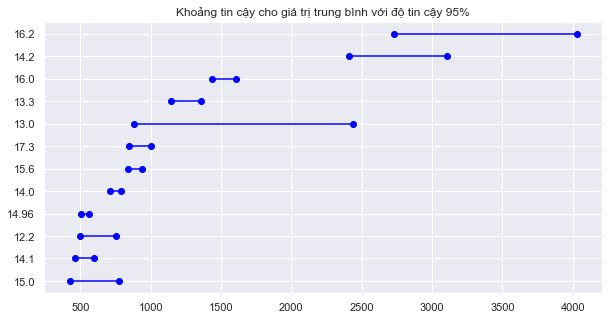

In [140]:
#display_size
lm=ols('latest_price ~ display_size',data=df).fit()
table=sm.stats.anova_lm(lm)
print(table,'\n')

if sm.stats.anova_lm(lm)['PR(>F)'][0] < 0.05:
    x = df.groupby('display_size')['latest_price'].describe()
    print(x.drop(['min', 'max', '25%', '50%', '75%'], axis = 1))
    Do_Thi_Khoang_Tin_Cay_Cua_Gia('display_size')

    

### 4.6. Chính sách bảo hành


In [141]:
#warranty
lm=ols('latest_price ~ warranty',data=df).fit()
table=sm.stats.anova_lm(lm)
print(table,'\n')

if sm.stats.anova_lm(lm)['PR(>F)'][0] < 0.05:
    x = df.groupby('warranty')['latest_price'].describe()
    print(x.drop(['min', 'max', '25%', '50%', '75%'], axis = 1))
    Do_Thi_Khoang_Tin_Cay_Cua_Gia('warranty')

    

              df        sum_sq    mean_sq     F  PR(>F)
warranty   1.000    519719.675 519719.675 1.416   0.234
Residual 894.000 328127871.175 367033.413   NaN     NaN 



### 4.7 Màn hình cảm ứng(Touchscreen)


                 df        sum_sq     mean_sq      F  PR(>F)
Touchscreen   1.000   9702823.995 9702823.995 27.197   0.000
Residual    894.000 318944766.855  356761.484    NaN     NaN 

              count     mean     std
Touchscreen                         
No          793.000  954.524 605.247
Yes         103.000 1280.772 531.519


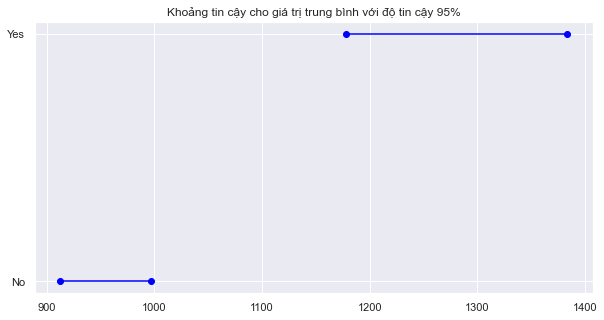

In [142]:
#Touchscreen
lm=ols('latest_price ~ Touchscreen',data=df).fit()
table=sm.stats.anova_lm(lm)
print(table,'\n')

if sm.stats.anova_lm(lm)['PR(>F)'][0] < 0.05:
    x = df.groupby('Touchscreen')['latest_price'].describe()
    print(x.drop(['min', 'max', '25%', '50%', '75%'], axis = 1))
    Do_Thi_Khoang_Tin_Cay_Cua_Gia('Touchscreen')


### 4.8 Microsoft Office


              df        sum_sq     mean_sq     F  PR(>F)
msoffice   1.000   3233813.382 3233813.382 8.884   0.003
Residual 894.000 325413777.468  363997.514   NaN     NaN 

           count     mean     std
msoffice                         
No       606.000 1033.587 679.086
Yes      290.000  905.184 400.750


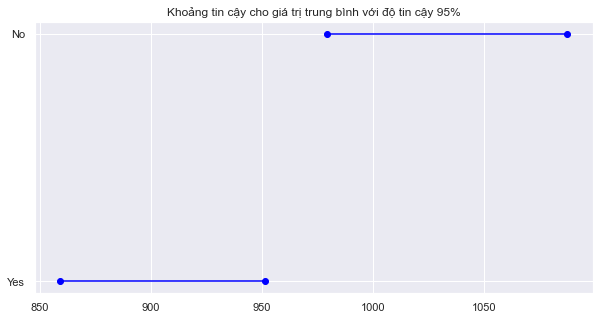

In [143]:
#msoffice
lm=ols('latest_price ~ msoffice',data=df).fit()
table=sm.stats.anova_lm(lm)
print(table,'\n')

if sm.stats.anova_lm(lm)['PR(>F)'][0] < 0.05:
    x = df.groupby('msoffice')['latest_price'].describe()
    print(x.drop(['min', 'max', '25%', '50%', '75%'], axis = 1))
    Do_Thi_Khoang_Tin_Cay_Cua_Gia('msoffice')

   

### 4.9 Hãng sản xuất


              df        sum_sq     mean_sq      F  PR(>F)
brand     20.000  66072096.942 3303604.847 11.009   0.000
Residual 875.000 262575493.908  300086.279    NaN     NaN 

            count     mean     std
brand                             
ALIENWARE   4.000 3345.745 855.604
APPLE      28.000 1972.202 713.794
ASUS      254.000 1029.882 671.269
Avita      18.000  724.868 296.798
DELL      154.000  806.389 307.666
HP        142.000  933.170 481.531
Infinix     4.000  531.245 135.555
LG          5.000  990.470 111.224
Lenovo    148.000  935.023 552.777
MICROSOFT   3.000 1266.109  60.741
MSI        52.000 1267.158 725.605
Mi          2.000  744.120  41.366
Nokia       4.000  658.970  59.042
RedmiBook   3.000  567.537  65.432
SAMSUNG     1.000  506.870     NaN
Smartron    3.000  645.537  75.056
Vaio        5.000  723.970  70.644
acer       58.000  938.916 441.710
iball       1.000  181.870     NaN
lenovo      3.000 1507.905 659.991
realme      4.000  679.178  83.183


C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning:

invalid value encountered in double_scalars



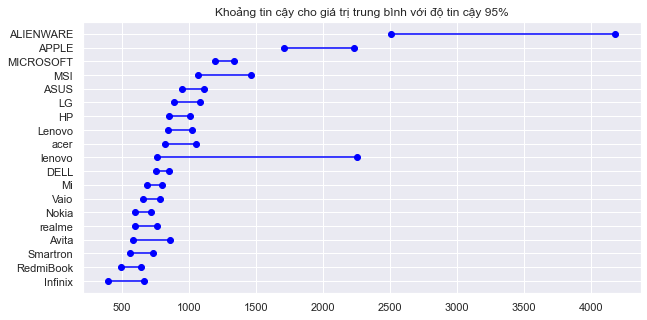

In [144]:
#brand
lm = ols('latest_price ~ brand', data = df).fit()
print(sm.stats.anova_lm(lm),'\n')

if sm.stats.anova_lm(lm)['PR(>F)'][0] < 0.05:
    x = df.groupby('brand')['latest_price'].describe()
    print(x.drop(['min', 'max', '25%', '50%', '75%'], axis = 1))

    Do_Thi_Khoang_Tin_Cay_Cua_Gia('brand')
    

### 4.10. Mẫu máy


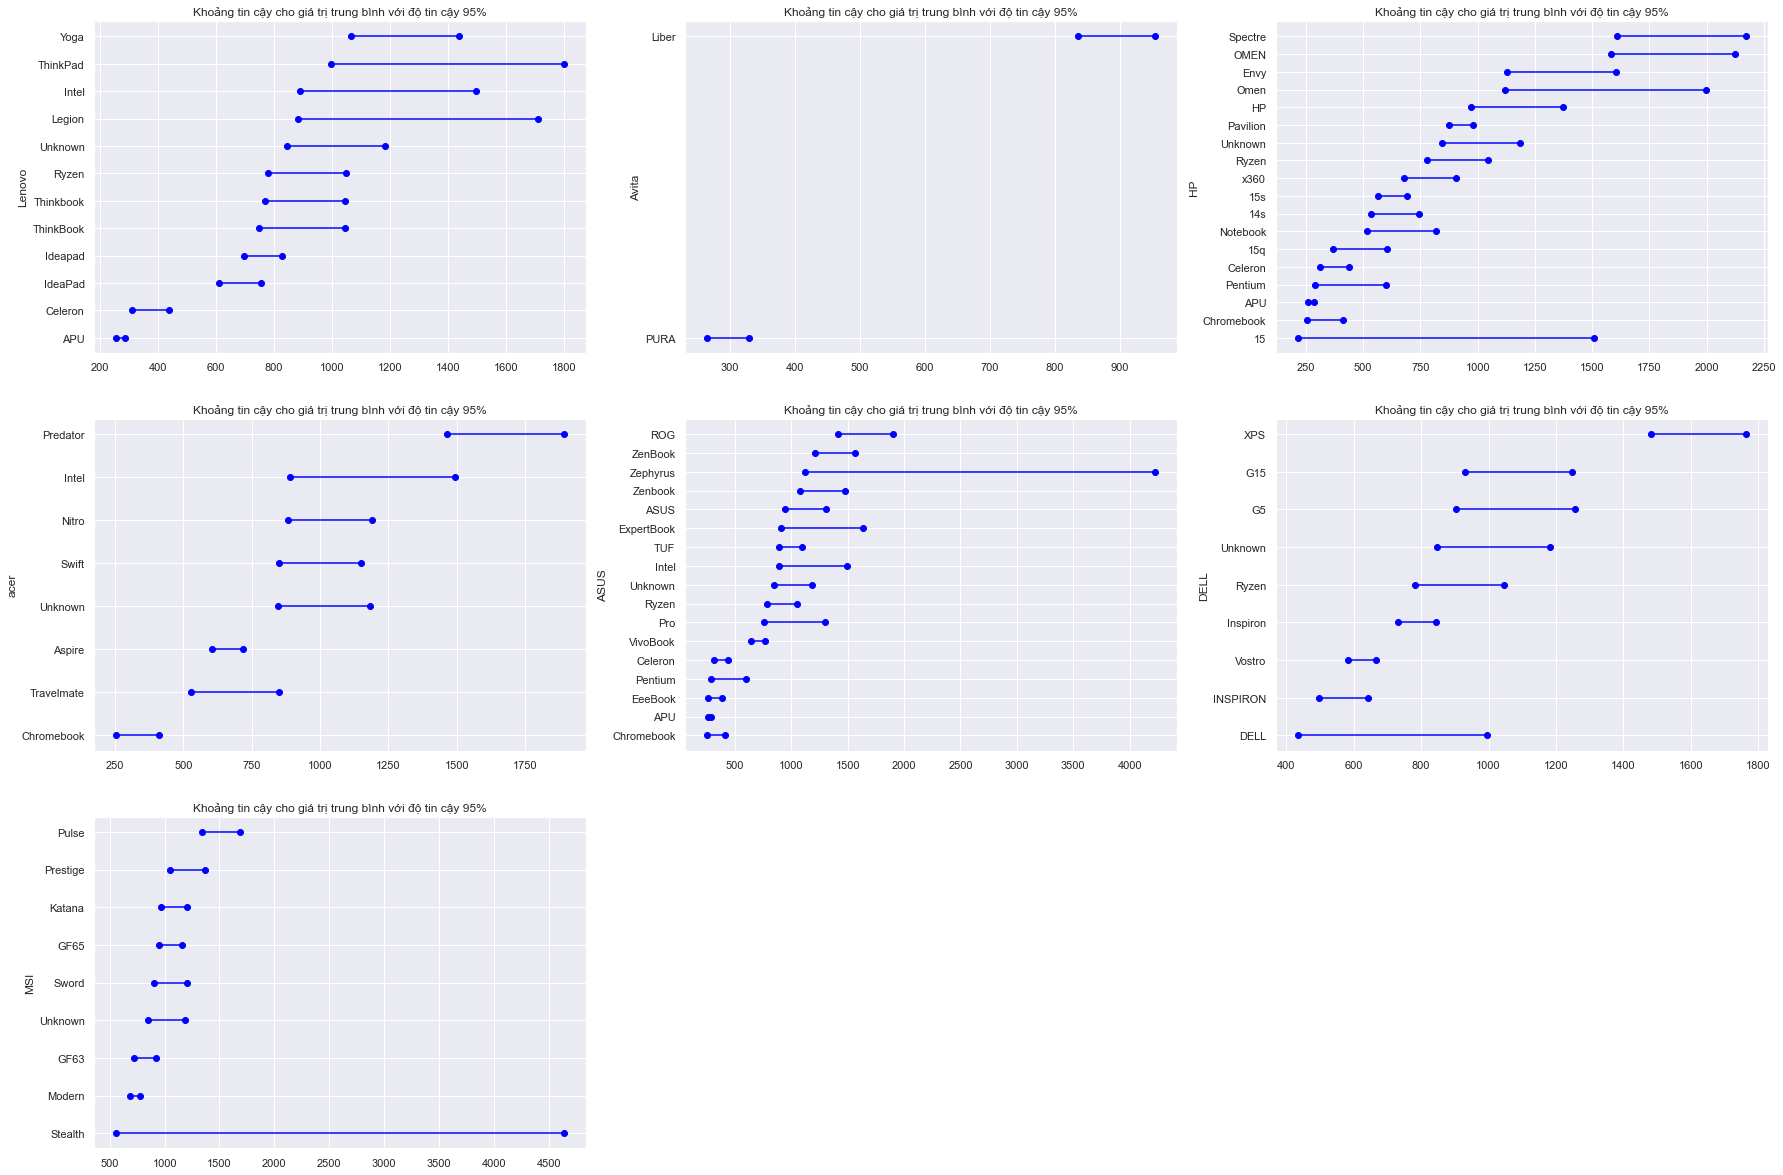

In [145]:
i=1
plt.figure(figsize = (30,50))
for brand in df['brand'].unique():
    temp = df.loc[df.brand == brand]['model'].unique()
    
    if len(temp) > 2:
#         print(temp)
        plt.subplot(7,3,i)
        Do_Thi_Model_Cho_Tung_Brand(temp)
        plt.ylabel(brand)
        plt.grid(True)
        i+=1

### 4.11. Thương hiệu vi xử lí


                     df        sum_sq     mean_sq      F  PR(>F)
processor_brand   4.000  23197281.217 5799320.304 16.917   0.000
Residual        891.000 305450309.633  342817.407    NaN     NaN 

                  count     mean     std
processor_brand                         
AMD             208.000  948.148 456.108
Intel           660.000  975.789 614.733
M1               24.000 1926.037 761.956
MediaTek          3.000  296.703   3.753
Qualcomm          1.000  506.870     NaN


C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning:

invalid value encountered in double_scalars



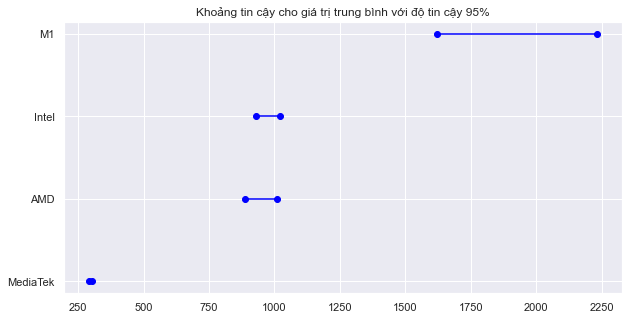

In [146]:
lm=ols('latest_price ~ processor_brand',data=df).fit()
table=sm.stats.anova_lm(lm)
print(table,'\n')

if sm.stats.anova_lm(lm)['PR(>F)'][0] < 0.05:
    x = df.groupby('processor_brand')['latest_price'].describe()
    print(x.drop(['min', 'max', '25%', '50%', '75%'], axis = 1))
    
    Do_Thi_Khoang_Tin_Cay_Cua_Gia('processor_brand')

### 4.12. Bộ xử lí


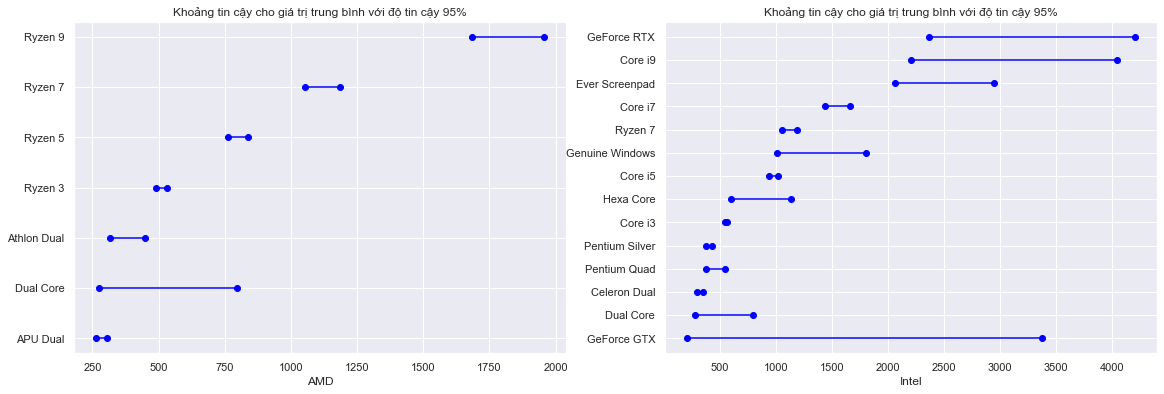

In [147]:
i=1
plt.figure(figsize = (30,50))
for brand in df['processor_brand'].unique():
    temp = df.loc[df.processor_brand == brand]['processor_name'].unique()
#     print(temp)
    if len(temp) > 1:
        
        plt.subplot(7,3,i)
        Do_Thi_Cho_Tung_Loai_Processor(temp)
        plt.xlabel(brand)
        plt.grid(True)
        i+=1

### 4.13. Thế hệ bộ xử lí


                     df        sum_sq     mean_sq      F  PR(>F)
processor_gnrtn   6.000  25196700.931 4199450.155 12.303   0.000
Residual        889.000 303450889.919  341339.584    NaN     NaN
                  count     mean      std
processor_gnrtn                          
10th            246.000 1150.804  819.481
11th            585.000  911.265  458.100
12th              3.000 3119.870 1133.314
4th               1.000  682.370      NaN
7th              12.000  718.832  184.448
8th              43.000 1096.424  470.956
9th               6.000 1142.592  906.346


C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning:

invalid value encountered in double_scalars



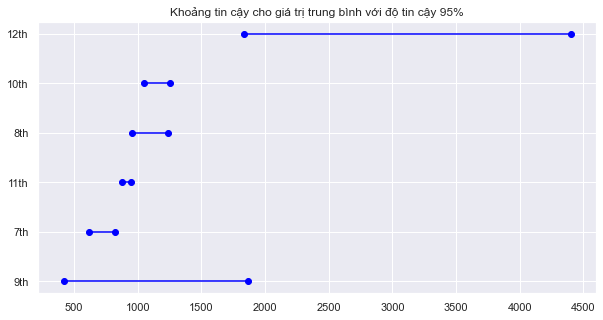

In [148]:
lm=ols('latest_price ~ processor_gnrtn',data=df).fit()
table=sm.stats.anova_lm(lm)
print(table)
if sm.stats.anova_lm(lm)['PR(>F)'][0] < 0.05:
    x = df.groupby('processor_gnrtn')['latest_price'].describe()
    print(x.drop(['min', 'max', '25%', '50%', '75%'], axis = 1))
    Do_Thi_Khoang_Tin_Cay_Cua_Gia('processor_gnrtn')


### 4.14. Dung lượng RAM


              df        sum_sq      mean_sq      F  PR(>F)
ram_gb     3.000  76893284.454 25631094.818 90.814   0.000
Residual 892.000 251754306.396   282235.770    NaN     NaN
           count     mean      std
ram_gb                            
16 GB GB 180.000 1546.418  749.426
32 GB GB   3.000 2196.476 1840.128
4 GB GB  259.000  773.084  475.132
8 GB GB  454.000  889.172  436.232


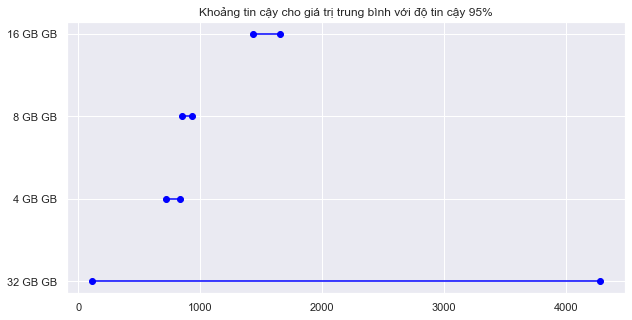

In [149]:
#ram_gb
lm=ols('latest_price ~ ram_gb',data=df).fit()
table=sm.stats.anova_lm(lm)
print(table)
if sm.stats.anova_lm(lm)['PR(>F)'][0] < 0.05:
    x = df.groupby('ram_gb')['latest_price'].describe()
    print(x.drop(['min', 'max', '25%', '50%', '75%'], axis = 1))
    Do_Thi_Khoang_Tin_Cay_Cua_Gia('ram_gb')

### 4.15. Loại RAM


              df        sum_sq     mean_sq      F  PR(>F)
ram_type   5.000  32249036.431 6449807.286 19.367   0.000
Residual 890.000 296398554.419  333032.084    NaN     NaN
           count     mean      std
ram_type                          
DDR3      12.000 1013.214  539.537
DDR4     760.000  922.425  533.542
DDR5       8.000 1995.370 1152.222
LPDDR3    14.000 1805.321  760.028
LPDDR4    36.000 1404.829 1095.548
LPDDR4X   66.000 1270.372  530.939


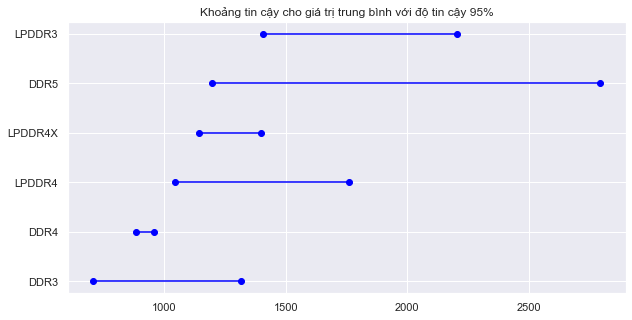

In [150]:
lm=ols('latest_price ~ ram_type',data=df).fit()
table=sm.stats.anova_lm(lm)
print(table)
if sm.stats.anova_lm(lm)['PR(>F)'][0] < 0.05:
    x = df.groupby('ram_type')['latest_price'].describe()
    print(x.drop(['min', 'max', '25%', '50%', '75%'], axis = 1))
    Do_Thi_Khoang_Tin_Cay_Cua_Gia('ram_type')

### 4.16. Dung lượng SSD


              df        sum_sq      mean_sq      F  PR(>F)
ssd        7.000 124087354.056 17726764.865 76.952   0.000
Residual 888.000 204560236.794   230360.627    NaN     NaN
          count     mean     std
ssd                             
0 GB    151.000  804.454 704.288
1024 GB 111.000 1802.738 682.903
128 GB   12.000  921.182 446.992
2048 GB   2.000 2560.870 680.237
256 GB  201.000  695.680 271.488
3072 GB   1.000 5745.870     NaN
32 GB     1.000  349.687     NaN
512 GB  417.000  971.649 384.358


C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning:

invalid value encountered in double_scalars



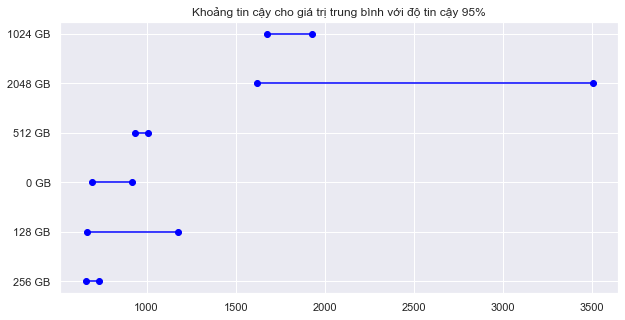

In [151]:
#ssd
lm=ols('latest_price ~ ssd',data=df).fit()
table=sm.stats.anova_lm(lm)
print(table)


if sm.stats.anova_lm(lm)['PR(>F)'][0] < 0.05:
    x = df.groupby('ssd')['latest_price'].describe()
    print(x.drop(['min', 'max', '25%', '50%', '75%'], axis = 1))
    Do_Thi_Khoang_Tin_Cay_Cua_Gia('ssd')

### 4.17. Dung lượng HDD


              df        sum_sq     mean_sq      F  PR(>F)
hdd        3.000  18816459.966 6272153.322 18.057   0.000
Residual 892.000 309831130.884  347344.317    NaN     NaN
          count     mean     std
hdd                             
0 GB    666.000 1051.577 597.495
1024 GB 164.000  690.629 254.652
2048 GB   1.000  810.121     NaN
512 GB   65.000 1145.137 983.106


C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning:

invalid value encountered in double_scalars



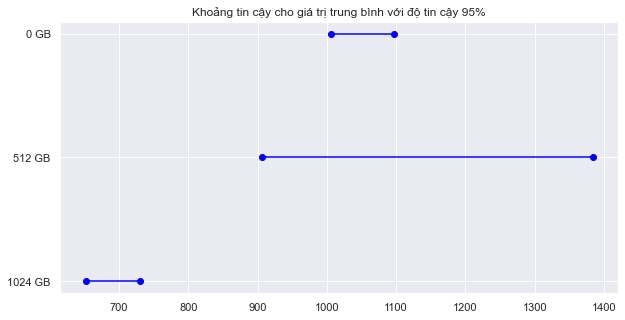

In [152]:
#hdd
lm=ols('latest_price ~ hdd',data=df).fit()
table=sm.stats.anova_lm(lm)
print(table)

if sm.stats.anova_lm(lm)['PR(>F)'][0] < 0.05:
    x = df.groupby('hdd')['latest_price'].describe()
    print(x.drop(['min', 'max', '25%', '50%', '75%'], axis = 1))
    Do_Thi_Khoang_Tin_Cay_Cua_Gia('hdd')

### 5.Hồi quy

In [153]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output

In [154]:
df = pd.read_csv('.\data\Cleaned_Laptop_data.csv',encoding='latin-1')
df = df.replace('Missing', float("NaN"))
for i in df.columns:
    df[i]=df[i].fillna(df[i].mode()[0])
df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,15.600,0,No,No,324.870,426.270,23,3.700,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,15.600,0,No,No,254.670,277.225,8,3.600,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,15.600,0,No,No,259.870,363.870,28,3.700,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,15.600,0,No,No,279.370,363.870,23,3.700,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,15.600,0,No,No,324.870,435.370,25,3.700,1657,234


In [155]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ssd'] = df['ssd'].str.replace(' GB', '').astype(int)
df['ram_gb'] = df['ram_gb'].str.replace(' GB GB', '').astype(int)
df['hdd'] = df['hdd'].str.replace(' GB', '').astype(int)
df['processor_gnrtn'] = df['processor_gnrtn'].str.replace('th', '').astype(int)
df['display_size'] = df['display_size'].astype(float)
df['Touchscreen'] = df['Touchscreen'].map({'No':0, 'Yes':1})


Chọn ra các biến độc lập

In [156]:
cdf = df[['ram_gb','ssd','hdd','processor_gnrtn','graphic_card_gb','display_size', 'warranty', 'Touchscreen', 'star_rating', 'ratings', 'reviews', 'latest_price']]
cdf.head()
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ram_gb           896 non-null    int32  
 1   ssd              896 non-null    int32  
 2   hdd              896 non-null    int32  
 3   processor_gnrtn  896 non-null    int32  
 4   graphic_card_gb  896 non-null    int64  
 5   display_size     896 non-null    float64
 6   warranty         896 non-null    int64  
 7   Touchscreen      896 non-null    int64  
 8   star_rating      896 non-null    float64
 9   ratings          896 non-null    int64  
 10  reviews          896 non-null    int64  
 11  latest_price     896 non-null    float64
dtypes: float64(3), int32(4), int64(5)
memory usage: 70.1 KB


Kiểm tra đa cộng tuyến(Multicollinearity) không bằng cách kiểm tra VIF.

In [157]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  

vif_df = pd.DataFrame()
vif_df["feature"] = cdf.columns
vif_df["VIF"] = [variance_inflation_factor(cdf.values, i)
                          for i in range(len(cdf.columns))]

print(vif_df)

            feature     VIF
0            ram_gb   6.401
1               ssd   6.816
2               hdd   2.122
3   processor_gnrtn 133.608
4   graphic_card_gb   1.886
5      display_size 137.244
6          warranty   2.555
7       Touchscreen   1.294
8       star_rating   3.529
9           ratings  31.674
10          reviews  31.897
11     latest_price   7.751


x là các biến độc lập, y là latest_price. Chọn ra 80% mẫu để train và 20% mẫu để test.

In [158]:
from sklearn.model_selection import train_test_split
x = cdf.drop(['latest_price'], axis = 1)
y = cdf['latest_price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Xây dựng mô hình hồi quy tuyến tính. Loại bỏ các biến có chỉ số p-value cao hơn 0.05. Rồi dựng lại mô hình cho đến khi đạt được mô hình tốt nhất (R-square cao, F-statistic cao, AIC thấp, BIC thấp).

In [159]:
import statsmodels.regression.linear_model as sm
ols = sm.OLS(endog = y_train, exog = x_train).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           latest_price   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                              436.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):                   7.46e-306
Time:                        20:07:40   Log-Likelihood:                         -5336.3
No. Observations:                 716   AIC:                                  1.069e+04
Df Residuals:                     705   BIC:                                  1.074e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
ram_gb             34.0602      4.012      8.491      0.000      26.184      41.936
ssd                 0.7758      0.071     10.861      0.000       0.636       0.916
hdd                 0.1278      0.050      2.572      0.010       0.030       0.225
processor_gnrtn   -93.0450     17.212     -5.406      0.000    -126.838     -59.252
graphic_card_gb    90.7803      8.448     10.746      0.000      74.194     107.367
display_size       82.1740     11.864      6.926      0.000      58.881     105.467
warranty          -37.6434     28.124     -1.338      0.181     -92.860      17.573
Touchscreen       301.3702     51.040      5.905      0.000     201.162     401.578
star_rating       -19.2139      8.339     -2.304      0.022     -35.587      -2.841
ratings             0.0937      0.073      1.285      0.199      -0.049       0.237
reviews            -0.8240      0.602     -1.368      0.172      -2.007       0.359
==============================================================================
Omnibus:                      435.033   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4558.745
Skew:                           2.593   Prob(JB):                         0.00
Kurtosis:                      14.222   Cond. No.                     4.08e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Loại các biến ratings, reviews, warranty

In [160]:
x_train = x_train.drop(['ratings'], axis = 1)
x_train = x_train.drop(['reviews'], axis = 1)
x_train = x_train.drop(['warranty'], axis = 1)
ols = sm.OLS(endog = y_train, exog = x_train).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           latest_price   R-squared (uncentered):                   0.871
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                              599.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):                   3.39e-309
Time:                        20:07:40   Log-Likelihood:                         -5338.1
No. Observations:                 716   AIC:                                  1.069e+04
Df Residuals:                     708   BIC:                                  1.073e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
ram_gb             34.0976      4.000      8.525      0.000      26.245      41.950
ssd                 0.7666      0.070     10.952      0.000       0.629       0.904
hdd                 0.1281      0.050      2.578      0.010       0.031       0.226
processor_gnrtn   -94.2342     17.178     -5.486      0.000    -127.961     -60.508
graphic_card_gb    91.3830      8.397     10.882      0.000      74.896     107.870
display_size       81.8189     11.863      6.897      0.000      58.529     105.109
Touchscreen       294.1301     50.459      5.829      0.000     195.064     393.197
star_rating       -21.7716      8.091     -2.691      0.007     -37.657      -5.887
==============================================================================
Omnibus:                      438.493   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4700.689
Skew:                           2.611   Prob(JB):                         0.00
Kurtosis:                      14.415   Cond. No.                     1.76e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Thực hiện dự đoán last_price

In [161]:
x_test = x_test.drop((['warranty', 'ratings', 'reviews']), axis = 1)
y_pred = ols.predict(x_test)

Bảng giá trị thực và dự đoán

In [162]:
compare = pd.DataFrame([y_test, y_pred])
compare.index = ['Lastest Price', 'Prediction']
compare.T

,Lastest Price,Prediction
145,597.090,905.096
60,519.987,694.214
733,649.870,572.447
31,388.570,485.361
506,844.870,840.002
...,...,...
635,3457.974,2395.691
308,766.870,1611.099
384,935.870,1087.862
895,747.370,776.979


Vẽ biểu đồ

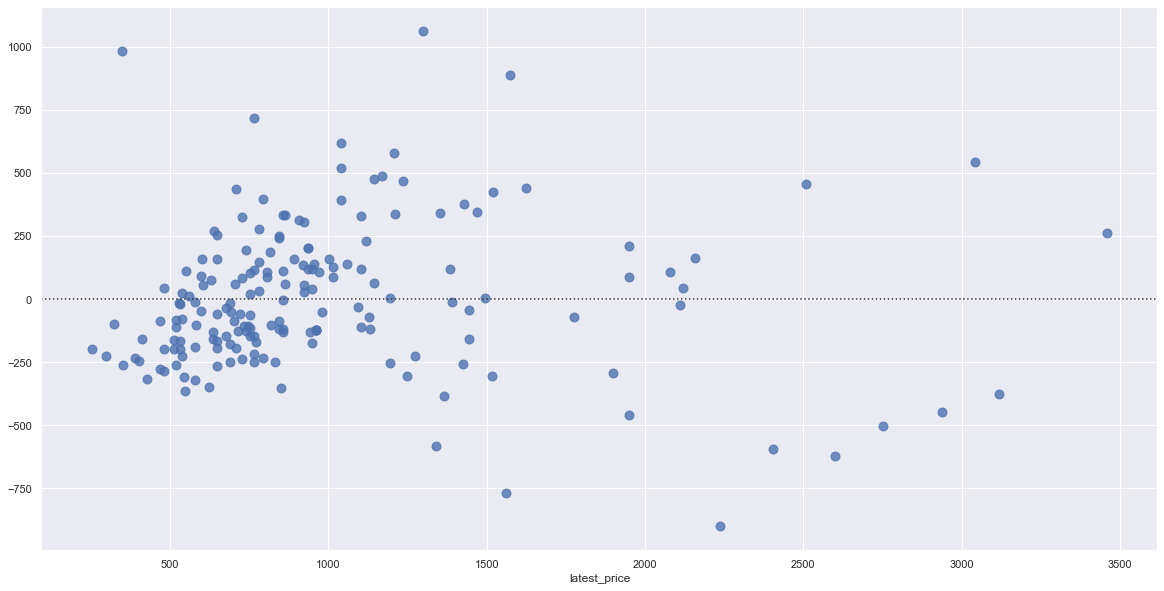

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,10)})
sns.residplot(x = y_test, y = y_pred, scatter_kws={"s": 80});
plt.show()

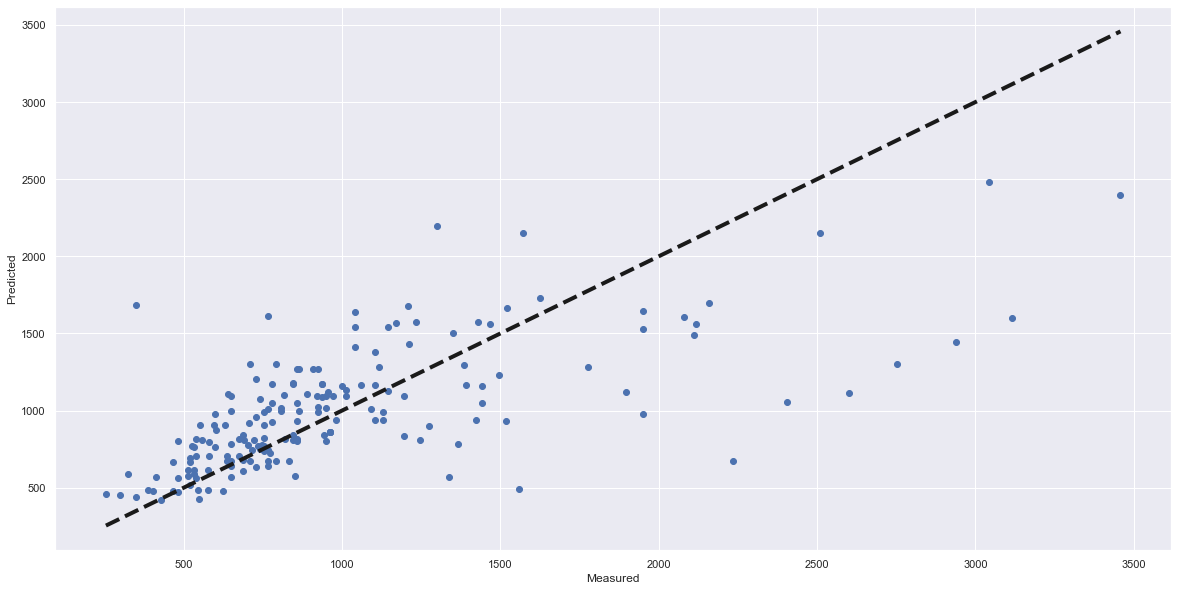

In [164]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()